In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import stats
import numpy as np
import pprint
import plotly.express as px
from pywaffle import Waffle
import squarify
%matplotlib inline

In [24]:
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06
3,11318193,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",-1.088053e+07,3.539795e+06
4,11286981,False,False,Austin Police Department,True,False,No,0,0,1,...,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn,-1.088577e+07,3.534194e+06


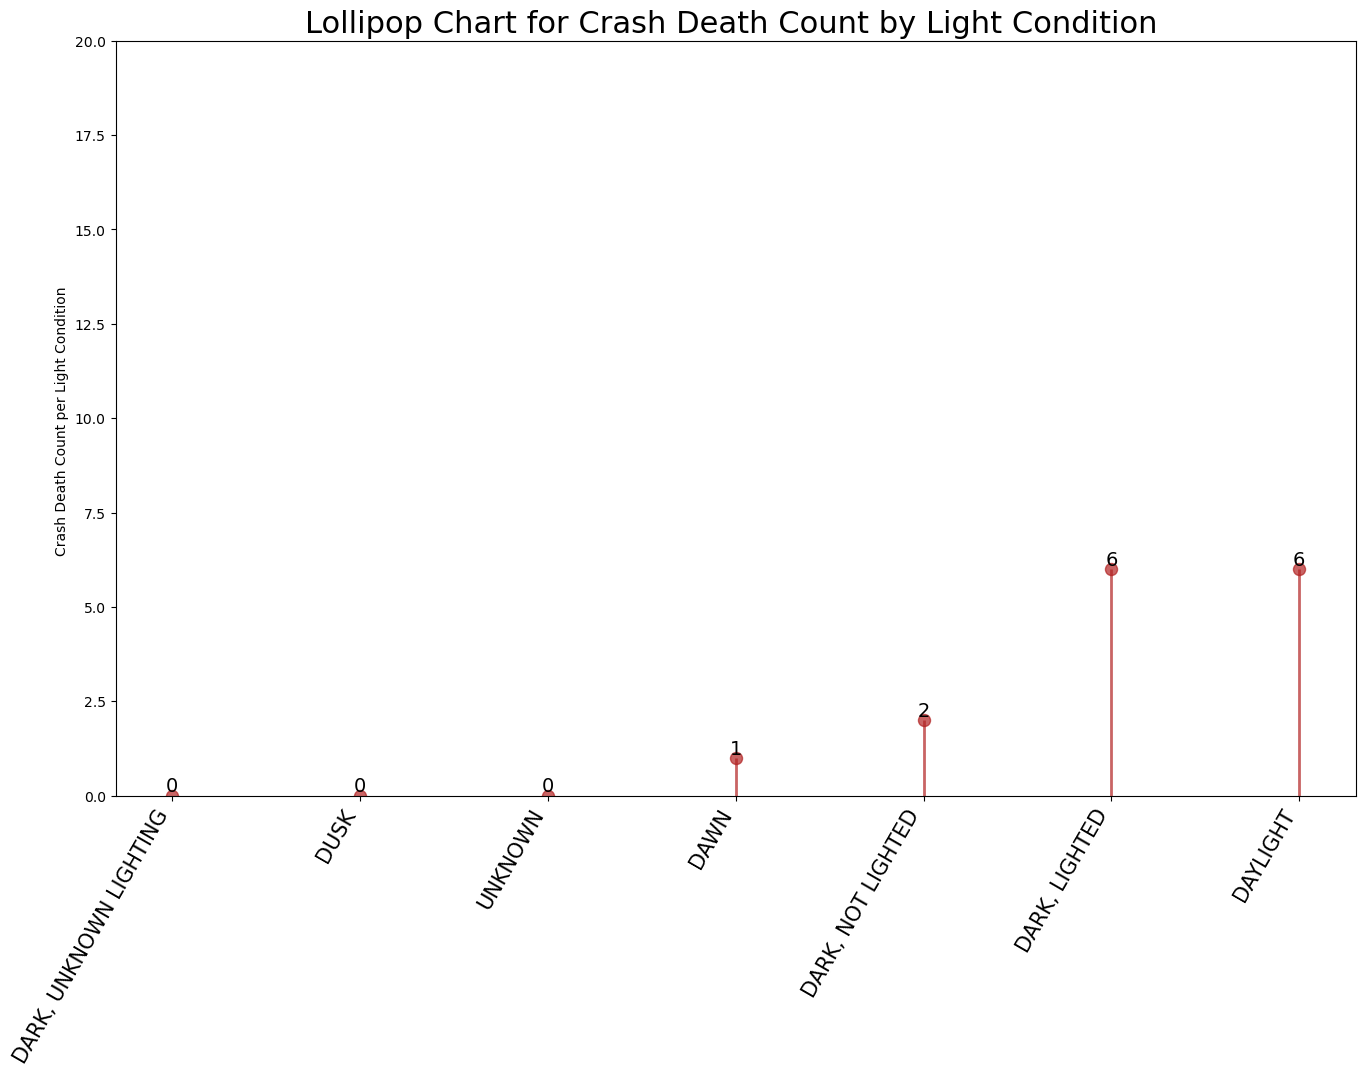

In [25]:
#prepare data
df_pre = df[['Crash Death Count','Light Condition']].groupby(by='Light Condition').sum()
df_pre.sort_values('Crash Death Count', inplace=True)
df_pre.reset_index(inplace=True)
df_pre

#plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.vlines(x=df_pre.index, ymin=0, ymax=df_pre['Crash Death Count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_pre.index, y=df_pre['Crash Death Count'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Crash Death Count by Light Condition ', fontdict={'size':22})
ax.set_ylabel('Crash Death Count per Light Condition ')
ax.set_xticks(df_pre.index)
ax.set_xticklabels(df_pre["Light Condition"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':15})
ax.set_ylim(0,20)

# Annotate
for row in df_pre.itertuples():
    ax.text(row.Index, row._2, 
    s=round(row._2,4),
    horizontalalignment= 'center',
    verticalalignment= "bottom", fontsize=14)

plt.show()

In [26]:
# Data
df_pre0 = df[['Crash Total Injury Count','Light Condition']].groupby(by='Light Condition').sum()
df_pre0.sort_values('Crash Total Injury Count', inplace=True)
df_pre0.reset_index(inplace=True)
df_pre0


fig = px.pie(df_pre0, values='Crash Total Injury Count', names='Light Condition', title='Crash Total Injury Count by Light Condition')
fig.show()

In [27]:
#prepare data
df_pre1 = df[['Crash Death Count','Weather Condition']].groupby(by='Weather Condition').sum()
df_pre1.sort_values('Crash Death Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x='Weather Condition', y='Crash Death Count',title='Crash Death Count by Weather Condition')

fig.show()

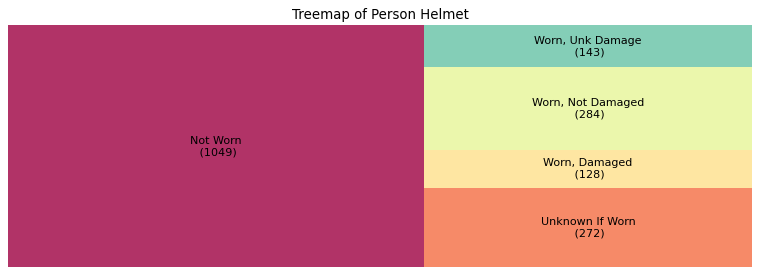

In [28]:
# Prepare Data
df_tree = df.groupby('Person Helmet').size().reset_index(name='counts')
labels = df_tree.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_tree['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Person Helmet')
plt.axis('off')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\pywaffle\waffle.py:402: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



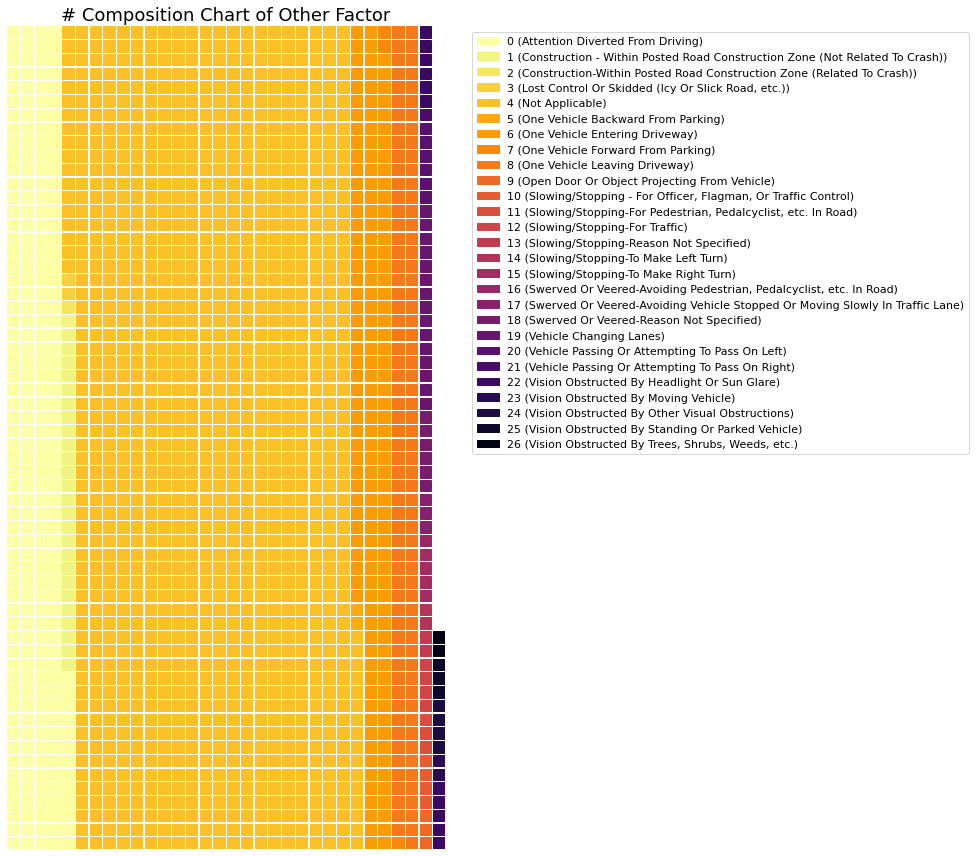

In [29]:
dff = df.groupby("Other Factor").size().reset_index(name='counts')
n_categories = dff.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': dff['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff[["Other Factor", 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 11},
            'title': {'label': '# Composition Chart of Other Factor', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=60,
    colors=colors,
    figsize=(50, 12)
)

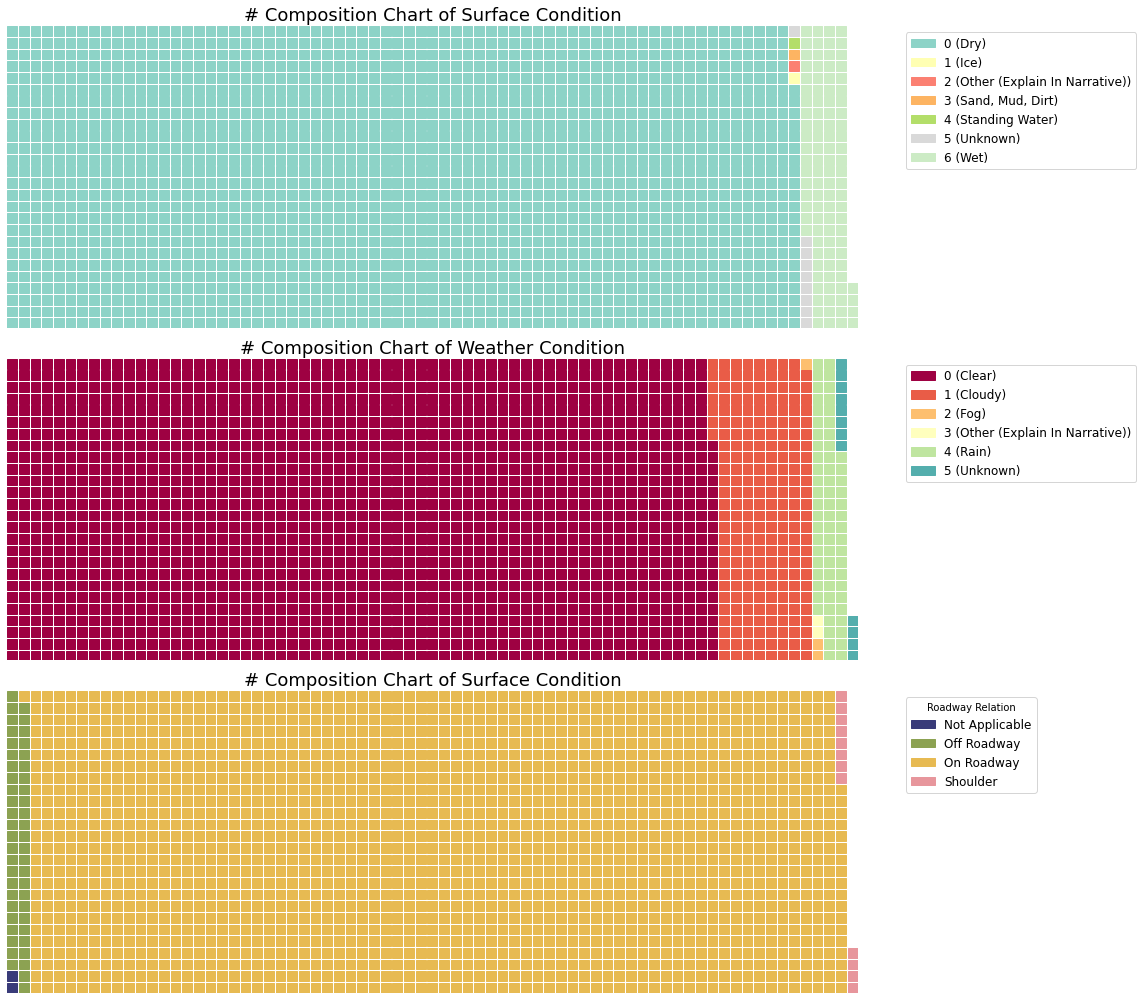

In [30]:
# Prepare Data
# By Surface Condition Data
dff = df.groupby("Surface Condition").size().reset_index(name='counts')
n_categories = dff.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Weather Condition Data
dff1 = df.groupby("Weather Condition").size().reset_index(name='counts')
n_categories = dff1.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
dff2 = df.groupby('Roadway Relation').size().reset_index(name='counts')
n_categories = dff2.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]      
    

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': dff['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff[["Surface Condition", 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Composition Chart of Surface Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': dff1['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff1[["Weather Condition",'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Composition Chart of Weather Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': dff2['counts'],
            'labels': ["{1}".format(n[0], n[1]) for n in dff2[['Roadway Relation', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':"Roadway Relation"},
            'title': {'label': '# Composition Chart of Surface Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=26,
    figsize=(16, 14)
)